# Итоговая работа
## Рекомендации по решению задач
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

## Данные для итоговой работы
<!-- Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices (Получаем 404) -->

Файл данных sample_data/kc_house_data.csv

| Поле | Опиание  |
|------|------|
id | Уникальный ID для каждого дома
date | Дата продажи дома
price | Стоимость продажи дома
bedrooms | Кол-во спален
bathrooms | Кол-во ванных комнат (0.5 - туалет без душа)
sqft_living | Кв. метры жилые
sqft_lot | Кв. метры общие
floors | Кол-во этажей
waterfront | Есть набержная или нет
view | Значение от 0 до 4 насколько хороший вид
condition | Значение от 1 до 5 насколько хорошее состояние
grade | Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
sqft_above | Кв. метры дома, которые находятся выше земли
sqft_basement | Кв. метры дома, которые находятся ниже земли
yr_built | Год постройки дома
yr_renovated | Год ремонта дома
zipcode | Индекс
lat | Широта
long | Долгота
sqft_living15 | Кв. метры жилой площади у 15 соседей
sqft_lot15 | Кв. метры общей площади у 15 соседей


In [184]:
import pandas as pd

df = pd.read_csv('sample_data/kc_house_data.csv', decimal='.')
df['condition'] = df['condition'].astype(int)
df['floors'] = df['floors'].astype(int)
# df['waterfront'] = df['waterfront'].astype(bool)
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570



## Задача 1
### Изучите стоимости недвижимости


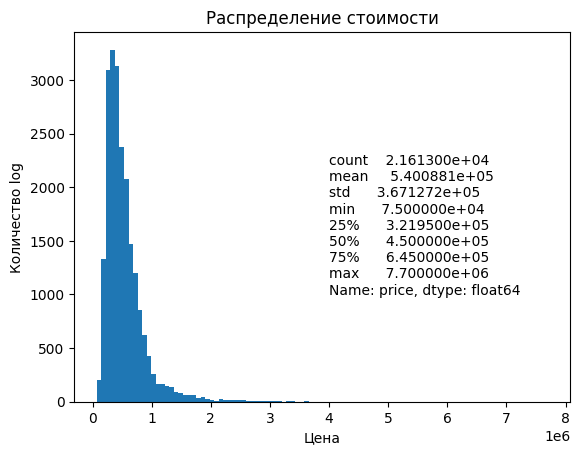

In [167]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=100)
# plt.semilogy() 
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.annotate(xy=(4000000,1000) , text = str(df['price'].describe()))
plt.ylabel('Количество log');

Распределение цен на дома не большое. Почти все предложения находятся в районе 645 тысяч.

### Изучите распределение квадратуры жилой


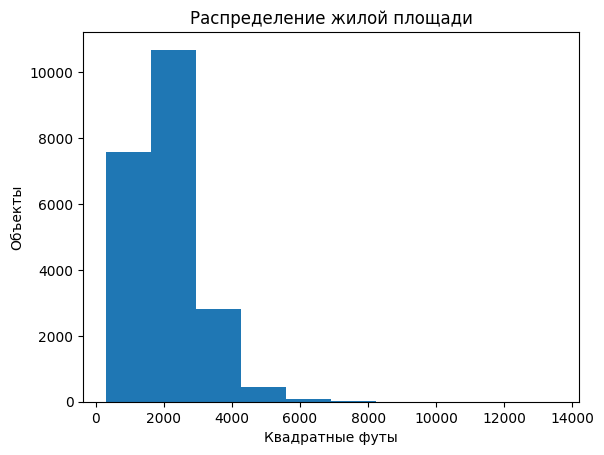

In [168]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Квадратные футы')
plt.ylabel('Объекты');

Наибольшее распространение имеет площадь 2000 - 3000 квадратных футов. Относительно 2000 - 3000 квадратных футов - меньшую площадь имеет больше домов чем большую площадь.

### Изучите распределение года постройки


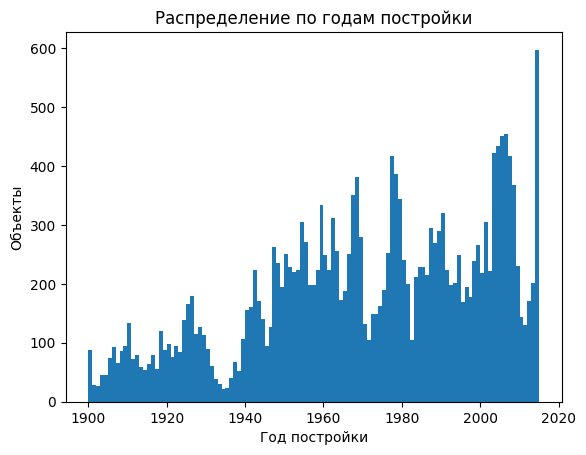

In [115]:
plt.hist(df['yr_built'], df['yr_built'].max() - df['yr_built'].min())
plt.title('Распределение по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Объекты');

Года строительства распределены по равномерной наростающей. На графике ярко выраженны экономические кризисы, когда строительство замедлялось. Максимальное предложение имеют новые дома.


## Задача 2

### Изучите распределение домов от наличия вида на набережную


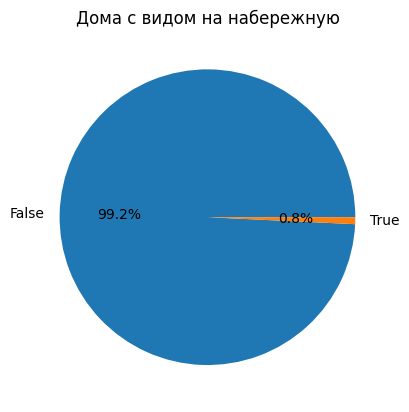

In [186]:
data = df['waterfront'].astype(bool).value_counts()
plt.title('Дома с видом на набережную')
plt.pie(data.values, autopct='%.1f%%', labels=data.index);

Вид на набережную имеет очень малое количество домов.

### Изучите распределение этажей домов


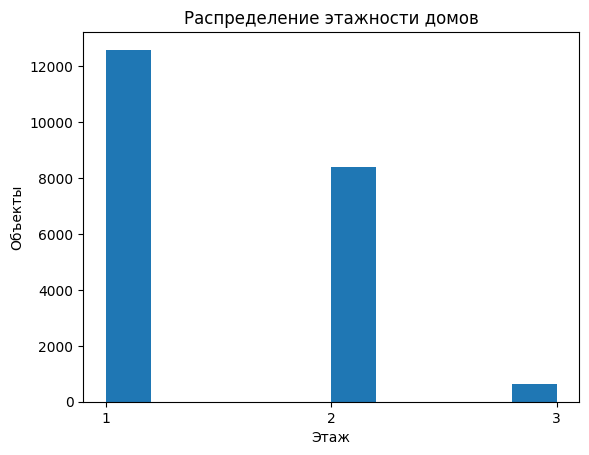

In [111]:
plt.hist(df['floors'])
plt.title('Распределение этажности домов')
plt.xticks(ticks=range(1,df['floors'].max()+1))
plt.xlabel('Этаж')
plt.ylabel('Объекты');


Данный график подтверждает название "одноэтажная америка". Наиболее популярны 1-2 этажа.

### Изучите распределение состояния домов


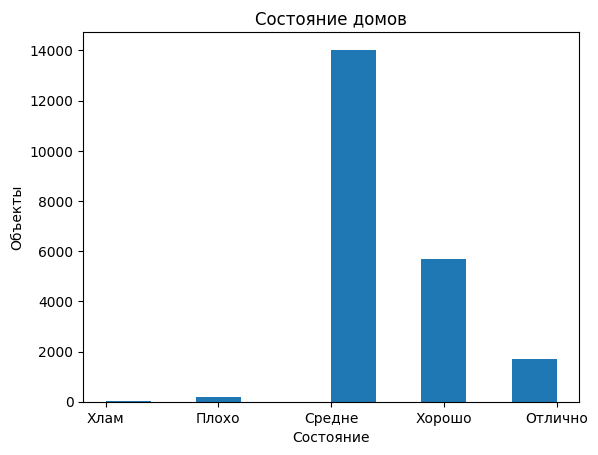

In [148]:

plt.hist(df['condition'])
plt.title('Состояние домов')
plt.xlabel('Состояние')
plt.xticks(ticks=range(1,6), labels=['Хлам', 'Плохо', 'Средне', "Хорошо", "Отлично"])
plt.ylabel('Объекты');

На рынке в основном представлены дома в среднем состоянии. Проще найти дома в отличном состоянии, чем откровенно плохие.


## Задача 3
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.
 

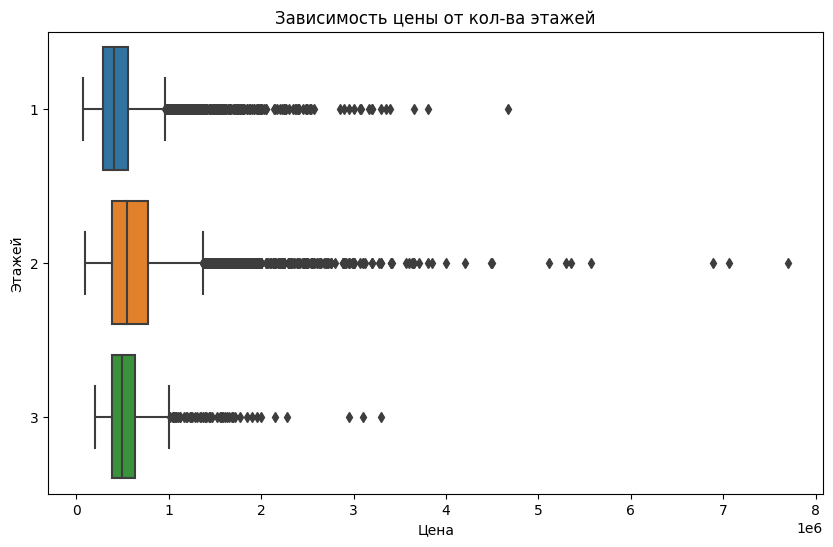

In [181]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['price'], y=df['floors'].astype(str))

plt.xlabel('Цена')
plt.ylabel('Этажей')
plt.title('Зависимость цены от кол-ва этажей');

Этажность не имеет ярко выраженного влияния на цену. 3х этажные дома не так популярны и имеют цену ниже чем двух этажные. 

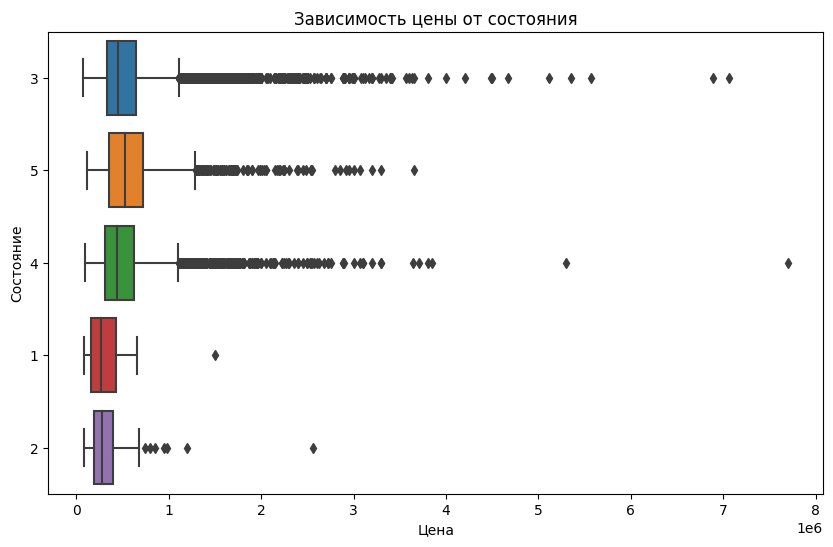

In [182]:

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['price'], y=df['condition'].astype(str))

plt.xlabel('Цена')
plt.ylabel('Состояние')
plt.title('Зависимость цены от состояния');

Недвижимость хорошего (4) и среднего (3) имеет одинаковую цену. Ожидаемо, плохое (1) и удовлетворительное (2) состояние дешевле. Недвижимость в отличном состоянии не сильно дороже остального, можно найти дома в идеальном состоянии по цене домов среднего состояния.   

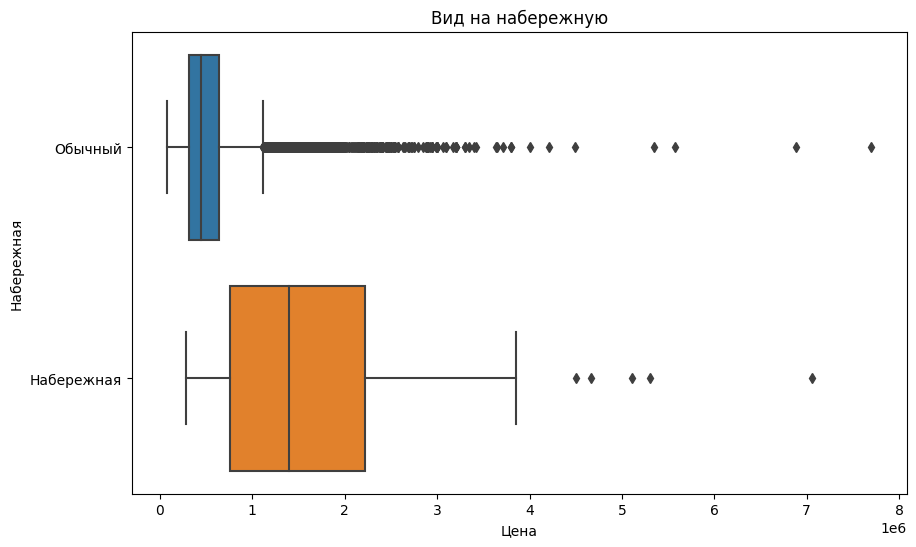

In [194]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['price'], y=df['waterfront'].map({1: 'Набережная', 0: 'Обычный'}))

plt.xlabel('Цена')
plt.ylabel('Вид')
plt.title('Вид на набережную - влияние на цену');


Цены на дома с видом на набережную заметно выше. Дешевые дома с видом на набережную стоят как дорогие с обычным видом.

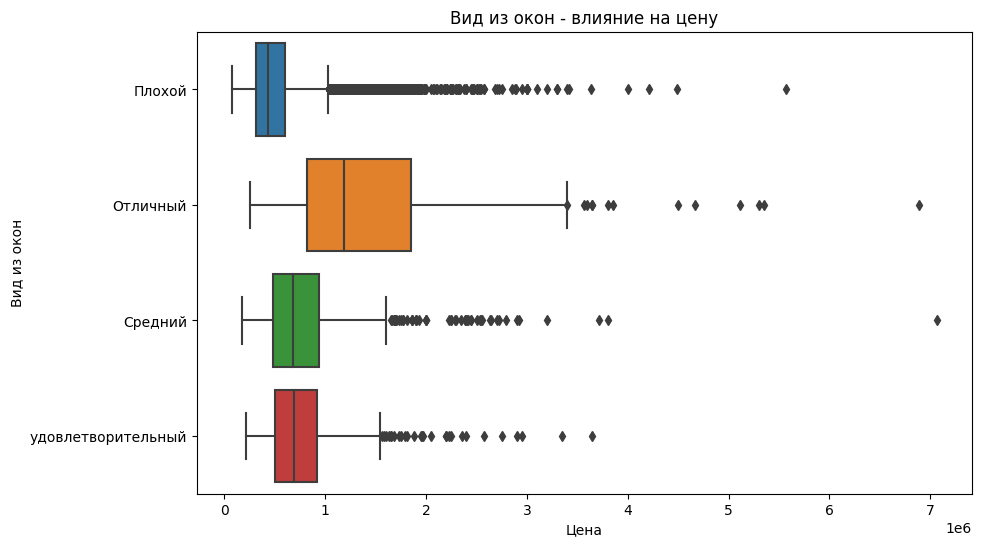

In [197]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['price'], y=df['view'].map({0: 'Плохой', 1: 'удовлетворительный',  2: 'Средний',  4: 'Хороший',   4: 'Отличный'}))

plt.xlabel('Цена')
plt.ylabel('Вид из окон')
plt.title('Вид из окон - влияние на цену');


На цену влияет отличный и плохой вид из окон. При этом отличный вид сильней увеличивает цену, чем плохой вид снижает. 

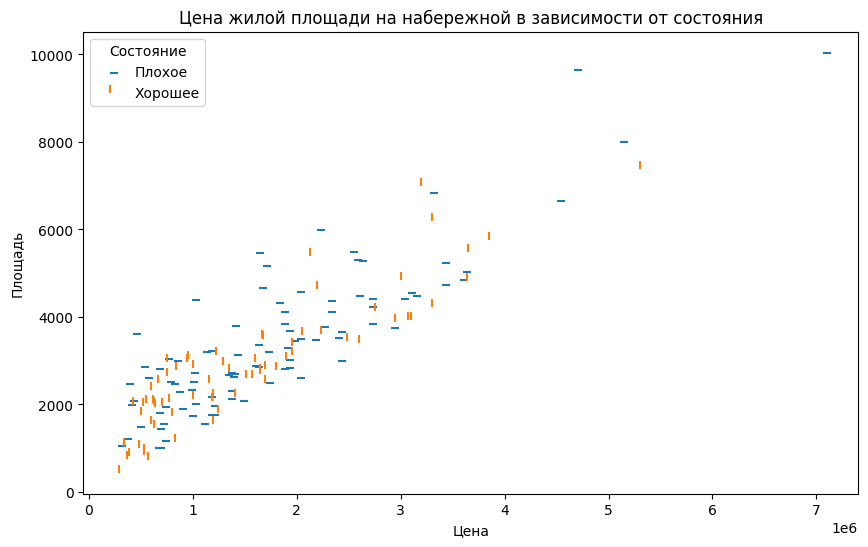

In [222]:
waterfront_df = df.query('waterfront == 1 & condition >= 4')
waterfront_df_condition = df.query('waterfront == 1 & condition <= 3')
# waterfront_df
plt.figure(figsize=(10, 6))
plt.scatter(waterfront_df_condition['price'], waterfront_df_condition['sqft_living'], marker=1, label='Плохое')
plt.scatter(waterfront_df['price'], waterfront_df['sqft_living'], marker=2, label='Хорошее')
plt.legend(title="Cостояние")

plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.title('Цена жилой площади на набережной в зависимости от состояния');

Для домов на набережной, наблюдаем линейную зависимость цены от квадратного метра, вне зависимости от состояния дома.